<a href="https://colab.research.google.com/github/dantebarross/neuroscience/blob/main/Gerando_RMSSD_e_outras_m%C3%A9tricas_do_dom%C3%ADnio_Tempo_de_heart_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gerando RMSSD (métrica de variabilidade) e outras métricas do domínio Tempo de heart rate

## RMSSD

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5624990/

The root mean square of successive differences between normal heartbeats (RMSSD) is obtained by first calculating each successive time difference between heartbeats in ms. Then, each of the values is squared and the result is averaged before the square root of the total is obtained. While the conventional minimum recording is 5 min, researchers have proposed ultra-short-term periods of 10 s (30), 30 s (31), and 60 s (36).


The RMSSD reflects the beat-to-beat variance in HR and is the primary time-domain measure used to estimate the vagally mediated changes reflected in HRV (12). The RMSSD is identical to the non-linear metric SD1, which reflects short-term HRV (37). Twenty-four-hour RMSSD measurements are strongly correlated with pNN50 and HF power (27). Minimum HR is more strongly correlated with LnSDANN than LnRMSSD (Ln means the natural logarithm). Maximum HR is weakly and inconsistently correlated with these time-domain measures (38).


While the RMSSD is correlated with HF power (10), the influence of respiration rate on this index is uncertain (39, 40). The RMSSD is less affected by respiration than is RSA across several tasks (41). The RMSSD is more influenced by the PNS than SDNN. Lower RMSSD values are correlated with higher scores on a risk inventory of sudden unexplained death in epilepsy (42).


NN50, pNN50, and RMSSD are calculated using the differences between successive NN intervals. Since their computation depends on NN interval differences, they primarily index HF HR oscillations, are largely unaffected by trends in an extended time series, and are strongly correlated (9).

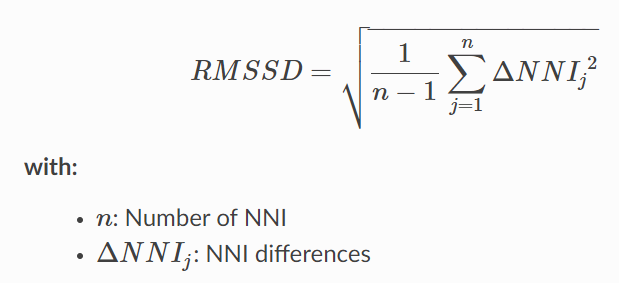

NN = normal inter-beat interval (normal to normal)

Execute a célula abaixo caso queira importar o arquivo diretamente de seu computador.

In [ ]:
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
filename

Execute a célula abaixo caso queira realizar o upload de um arquivo que foi enviado para a pasta "Colab Notebooks" do Drive.
1. Altere a variável *path* caso queira escolher outro caminho).
2. Altera a variável *filename*, colocando o nome do seu arquivo .csv




In [ ]:
# Importando arquivo de pasta do Drive
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Colab Notebooks/'
filename = 'RR_time_intervals.csv'
filename = path + filename

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Exibindo dados importados em formato de tabela.

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv(filename, sep=',')
df

,RR
0,0.414062
1,0.392578
2,0.404297
3,0.402344
4,0.777344
...,...
2831,0.650391
2832,0.658203
2833,0.646484
2834,0.636719


## Calculando RMSSD

In [ ]:
# Transformando a coluna de números flutuantes (float) com vírgula em flutuantes com ponto (usar apenas caso necessário)
# df['RR'] = df['RR'].str.replace(",", ".").astype(float)

In [ ]:
rr_intervals_list = list(df['RR'])

print(rr_intervals_list[0:10])
print('\n Tamanho da lista de NNs:', len(rr_intervals_list))

[0.4140625, 0.392578125, 0.404296875, 0.40234375, 0.77734375, 0.7265625, 0.732421875, 0.396484375, 0.427734375, 0.505859375]

 Tamanho da lista de NNs: 2836


In [ ]:
# passando de segundos para milisegundos
rr_intervals_list_ms = [number * 1000 for number in rr_intervals_list]
rr_intervals_list_ms[300:305]

[460.9375, 562.5, 437.5, 503.90625, 494.140625]

In [ ]:
# calculating differences between NNs
difference_between_RRs = np.diff(rr_intervals_list_ms)
difference_between_RRs

array([ -21.484375,   11.71875 ,   -1.953125, ...,  -11.71875 ,
         -9.765625, -220.703125])

In [ ]:
# square each value
squared_numbers = np.square(difference_between_RRs)
squared_numbers

array([4.61578369e+02, 1.37329102e+02, 3.81469727e+00, ...,
       1.37329102e+02, 9.53674316e+01, 4.87098694e+04])

In [ ]:
# squared list is averaged 
averaged_squared_numbers = np.mean(squared_numbers)
averaged_squared_numbers

9429.542770251184

In [ ]:
# square root of the average
RMSSD = np.sqrt(averaged_squared_numbers)
RMSSD

97.10583283331225

## Calculando RMSSD (uma linha)

In [ ]:
import numpy as np

RMSSD = np.sqrt(np.mean(np.square(np.diff(rr_intervals_list_ms))))
RMSSD

97.10583283331225

## Biblioteca hrv-analysis

In [ ]:
!pip install hrv-analysis --quiet

In [ ]:
from hrvanalysis import get_time_domain_features  # https://pypi.org/project/hrv-analysis/
from hrvanalysis import remove_outliers, remove_ectopic_beats, interpolate_nan_values

time_domain_features = get_time_domain_features(rr_intervals_list_ms)
time_domain_features

{'mean_nni': 467.56889655324403,
 'sdnn': 95.65170059150569,
 'sdsd': 97.1058328308684,
 'nni_50': 1131,
 'pnni_50': 39.89417989417989,
 'nni_20': 1938,
 'pnni_20': 68.35978835978835,
 'rmssd': 97.10583283331225,
 'median_nni': 435.546875,
 'range_nni': 437.5,
 'cvsd': 0.20768240477316352,
 'cvnni': 0.20457241980083982,
 'mean_hr': 132.2517916230832,
 'max_hr': 153.6,
 'min_hr': 72.45283018867924,
 'std_hr': 19.59022607833464}

Plots 
https://aura-healthcare.github.io/hrvanalysis/tutorial.html

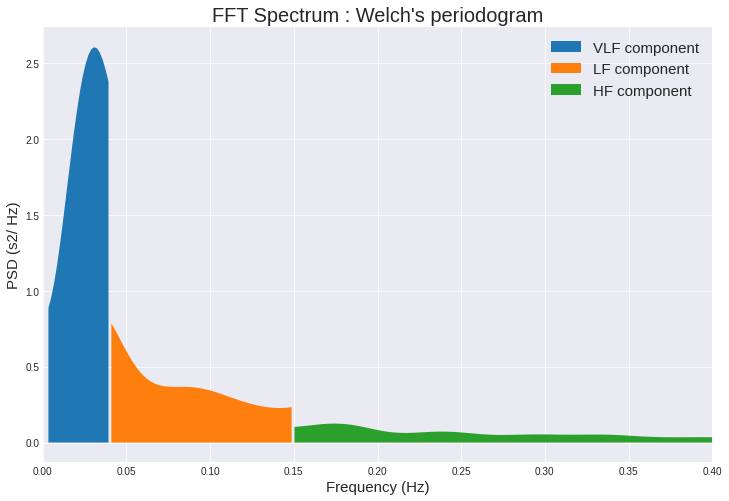

In [ ]:
from hrvanalysis import plot_psd

plot_psd(rr_intervals_list_ms, method="welch")

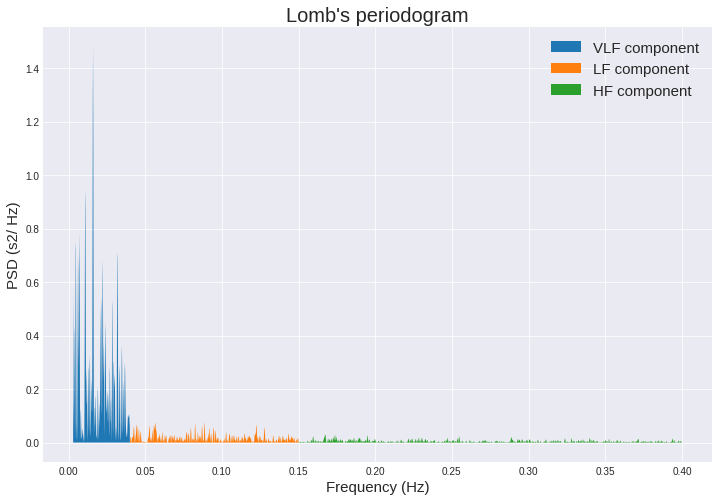

In [ ]:
plot_psd(rr_intervals_list_ms, method="lomb")

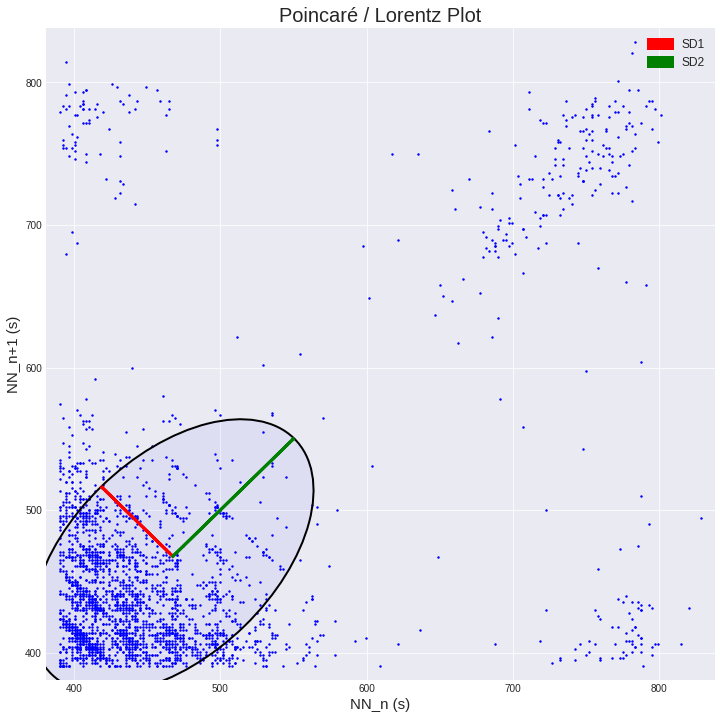

In [ ]:
from hrvanalysis import plot_poincare

plot_poincare(rr_intervals_list_ms, plot_sd_features=True)

In [ ]:
1000 / 60

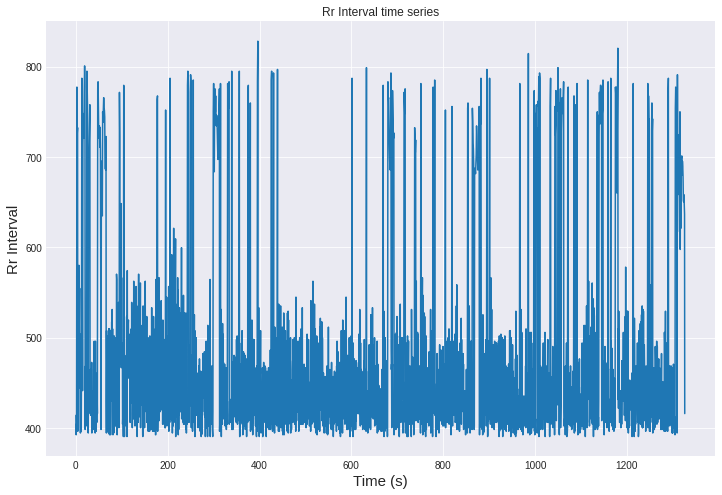

In [ ]:
from hrvanalysis.plot import plot_timeseries
plot_timeseries(rr_intervals_list_ms)

## Biblioteca pyhrv

In [ ]:
!pip install pip install pyhrv --quiet

     |████████████████████████████████| 3.2 MB 5.2 MB/s 
     |████████████████████████████████| 230 kB 59.5 MB/s 
     |████████████████████████████████| 106 kB 65.3 MB/s 
     |████████████████████████████████| 47 kB 4.3 MB/s 


In [ ]:
import pyhrv  # https://pyhrv.readthedocs.io/en/latest/_pages/api/time.html#rmssd-rmssd
import pyhrv.time_domain as td

# Compute RMSSD parameter
results = td.rmssd(rr_intervals_list_ms)

# Print RMSSD
print(results['rmssd'])

97.10583283331226


/usr/local/lib/python3.7/dist-packages/pyhrv/time_domain.py:576: UserWarning: CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a malfunction of the function. This function will be reviewed over the next updates to solve this issue
  warnings.warn('CAUTION: The TINN computation is currently providing incorrect results in the most cases due to a '


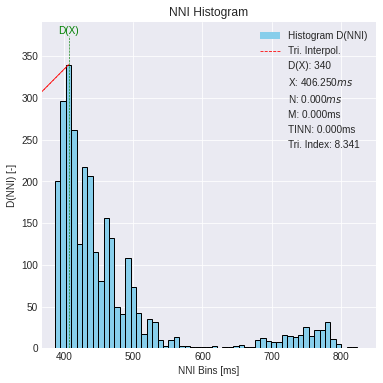

In [ ]:
time_domain_metrics = td.time_domain(rr_intervals_list_ms, plot=True)

In [ ]:
time_domain_metrics

ReturnTuple(nni_counter=2836, nni_mean=467.56889655324403, nni_min=390.625, nni_max=828.125, hr_mean=132.2517916230832, hr_min=72.45283018867924, hr_max=153.6, hr_std=19.59368084003654, nni_diff_mean=59.79042658730159, nni_diff_min=0, nni_diff_max=419, sdnn=95.65170059150569, sdnn_index=96.18243231237159, sdann=9.507864530942928, rmssd=97.10583283331226, sdsd=76.52916776567903, nn50=1131, pnn50=39.89417989417989, nn20=1938, pnn20=68.35978835978837, nni_histogram=<Figure size 432x432 with 1 Axes>, tinn_n=0, tinn_m=0, tinn=0, tri_index=8.341176470588236)